In [ ]:
# lr, size, range, algo

import torch
import torch.nn as nn
import torch.optim as optim


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 6)
        self.fc2 = nn.Linear(6, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class SeqModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
      super(SeqModel, self).__init__()
      self.linear_layer_stack = nn.Sequential(
            nn.Linear(input_features,hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units,output_features),
        )

    def forward(self, x):
      return self.linear_layer_stack(x)

X_train = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
y_train = torch.tensor([[0.0], [1.0], [1.0], [0.0]])

# Instantiate the Model, Define Loss Function and Optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)

for epoch in range(500):
    model.train()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/500], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    test_data = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
    predictions = model(test_data)
    print(f'Predictions:\n{predictions}')
    # results very sensitive to random initial parameters


# Instantiate the Model, Define Loss Function and Optimizer
model_seq = SeqModel(2,1)
criterion_seq = nn.MSELoss()
optimizer_seq = optim.Adam(model_seq.parameters(), lr=0.01)

for epoch in range(500):
    model_seq.train()

    # Forward pass
    outputs_seq = model_seq(X_train)
    loss_seq = criterion_seq(outputs_seq, y_train)

    # Backward pass and optimize
    optimizer_seq.zero_grad()
    loss_seq.backward()
    optimizer_seq.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/500], Loss: {loss_seq.item():.4f}')

model_seq.eval()
with torch.no_grad():
    test_data_seq = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
    predictions_seq = model_seq(test_data_seq)
    print(f'Predictions:\n{predictions_seq}')
    # results very sensitive to random initial parameters

Epoch [100/500], Loss: 0.0011
Epoch [200/500], Loss: 0.0000
Epoch [300/500], Loss: 0.0000
Epoch [400/500], Loss: 0.0000
Epoch [500/500], Loss: 0.0000
Predictions:
tensor([[-2.2352e-08],
        [ 1.0000e+00],
        [ 1.0000e+00],
        [-3.7253e-09]])
Epoch [100/500], Loss: 0.0298
Epoch [200/500], Loss: 0.0000
Epoch [300/500], Loss: 0.0000
Epoch [400/500], Loss: 0.0000
Epoch [500/500], Loss: 0.0000
Predictions:
tensor([[5.9605e-08],
        [1.0000e+00],
        [1.0000e+00],
        [5.9605e-08]])


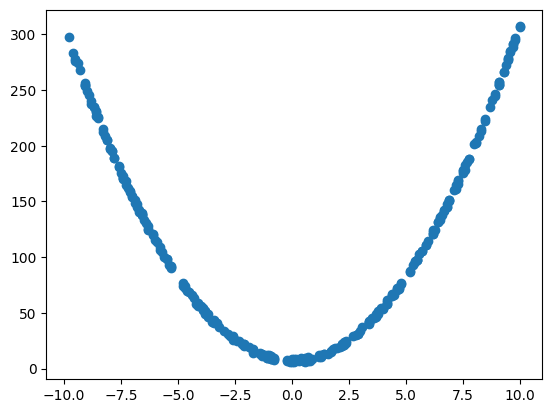

torch.Size([300, 1])
<class 'torch.Tensor'>
torch.Size([300, 1])
<class 'torch.Tensor'>
Epoch [100/1000], Loss: 7814.0864
Epoch [200/1000], Loss: 7813.8350
Epoch [300/1000], Loss: 108.7901
Epoch [400/1000], Loss: 3.2343
Epoch [500/1000], Loss: 2.3390
Epoch [600/1000], Loss: 1.9810
Epoch [700/1000], Loss: 1.7892
Epoch [800/1000], Loss: 1.8997
Epoch [900/1000], Loss: 1.5771
Epoch [1000/1000], Loss: 3.9011

Predictions:
tensor([[ 9.6689],
        [89.4423],
        [46.3254]])


In [ ]:
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


x_linr = np.array([random.randint(-100, 100)/10 for _ in range(300)], dtype=np.float32)
y_linr = np.array([3*x_linr[i]**2 + 7.21 + random.randint(-100, 100)/50  for i in range(300)])

#x_trn = torch.rand(100, 1) * 10  # Features
#y_trn = 3 * X + 7 + torch.randn(100, 1) * 2  # Labels with noise

import matplotlib.pyplot as plt
plt.scatter(x_linr, y_linr)
plt.show()


x_trn = torch.tensor(x_linr).reshape([x_linr.size, 1])
y_trn = torch.tensor(y_linr).reshape([y_linr.size, 1])

print(x_trn.size())
print(type(x_trn))
print(y_trn.size())
print(type(y_trn))


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 15)
        self.fc2 = nn.Linear(15, 20)
        self.fc3 = nn.Linear(20, 15)
        self.fc4 = nn.Linear(15, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        #x = torch.relu(self.fc1(x))
        #x = torch.sigmoid(self.fc2(x))
        #x = torch.relu(self.fc3(x))
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x
'''

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(x_trn.shape[1], 10)  # Input layer
        self.relu = nn.ReLU()                          # Activation function
        self.fc2 = nn.Linear(10, 1) # Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
'''

# Instantiate the Model, Define Loss Function and Optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)

for epoch in range(1000):
    model.train()

    # Forward pass
    outputs = model(x_trn)
    loss = criterion(outputs, y_trn)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = (outputs.round() == y_trn.round()).float().mean()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/1000], Loss: {loss.item():.4f}')
        #, Accuracy: {accuracy.item():.4f}')


model.eval()
with torch.no_grad():
    #test_data = torch.tensor([[10.0], [21.0], [13.0], [25.0]])
    #test_data = x_trn
    predictions = model(torch.tensor([[1.0], [5.21], [3.6]]))
    #accuracy = (predictions.round() == torch.tensor(y_linr_trans).round()).float().mean()
    print()
    print(f'Predictions:\n{predictions}')
    #, Accuracy: {accuracy.item():.4f}')


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generate synthetic data
torch.manual_seed(42)
X = torch.rand(100, 1) * 10  # Features
y = 3 * X + 7 + torch.randn(100, 1) * 2  # Labels with noise

print(X.size())
print(y.size())

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input and one output feature

    def forward(self, x):
        return self.linear(x)

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 5)
        self.fc2 = nn.Linear(5, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


model = LinearRegressionModel()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    predictions = model(X)
    loss = criterion(predictions, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Model evaluation
model.eval()
with torch.no_grad():
    sample_input = torch.tensor([[6.1], [3.2], [5.5]])
    prediction = model(sample_input)
    print(f"Prediction for input 5.0: {prediction}")

###

model = SimpleNN()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    predictions = model(X)
    loss = criterion(predictions, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Model evaluation
model.eval()
with torch.no_grad():
    sample_input = torch.tensor([[6.1], [3.2], [5.5]])
    prediction = model(sample_input)
    print(f"Prediction for input 5.0: {prediction}")


torch.Size([100, 1])
torch.Size([100, 1])
Epoch [100/1000], Loss: 7.4964
Epoch [200/1000], Loss: 4.5115
Epoch [300/1000], Loss: 3.3660
Epoch [400/1000], Loss: 2.9265
Epoch [500/1000], Loss: 2.7578
Epoch [600/1000], Loss: 2.6931
Epoch [700/1000], Loss: 2.6682
Epoch [800/1000], Loss: 2.6587
Epoch [900/1000], Loss: 2.6550
Epoch [1000/1000], Loss: 2.6536
Prediction for input 5.0: tensor([[25.1922],
        [16.7345],
        [23.4423]])
Epoch [100/1000], Loss: 84.2593
Epoch [200/1000], Loss: 23.2246
Epoch [300/1000], Loss: 11.7796
Epoch [400/1000], Loss: 8.1650
Epoch [500/1000], Loss: 38.6789
Epoch [600/1000], Loss: 18.8581
Epoch [700/1000], Loss: 19.4039
Epoch [800/1000], Loss: 7.9105
Epoch [900/1000], Loss: 4.5481
Epoch [1000/1000], Loss: 6.2686
Prediction for input 5.0: tensor([[29.9716],
        [19.5261],
        [27.8104]])


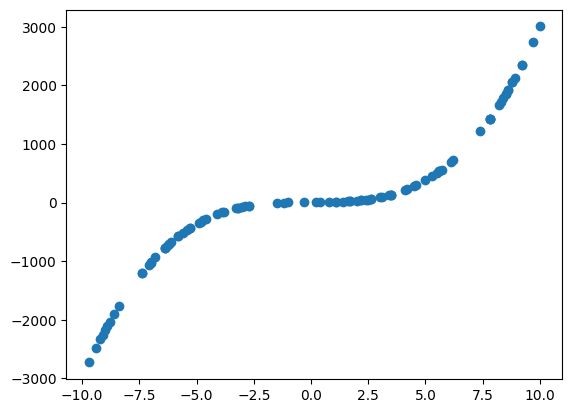

torch.Size([100, 1])
<class 'torch.Tensor'>
torch.Size([100, 1])
<class 'torch.Tensor'>
Epoch [100/1000], Loss: 79425.4219
Epoch [200/1000], Loss: 5047.3174
Epoch [300/1000], Loss: 1205.9933
Epoch [400/1000], Loss: 627.9489
Epoch [500/1000], Loss: 182.6213
Epoch [600/1000], Loss: 257.2213
Epoch [700/1000], Loss: 189.1931
Epoch [800/1000], Loss: 343.3172
Epoch [900/1000], Loss: 375.7608
Epoch [1000/1000], Loss: 547.0379
Epoch [1100/1000], Loss: 373.8382
Epoch [1200/1000], Loss: 633.4650
Epoch [1300/1000], Loss: 58.7231
Epoch [1400/1000], Loss: 72.0668
Epoch [1500/1000], Loss: 380.3866
Epoch [1600/1000], Loss: 202.2705
Epoch [1700/1000], Loss: 49.2714
Epoch [1800/1000], Loss: 120.4548
Epoch [1900/1000], Loss: 19.1754
Epoch [2000/1000], Loss: 131.5035

Predictions:
tensor([[ 11.6802],
        [422.1056],
        [142.6257],
        [-42.0006]])
[10.21, 431.472283, 147.17800000000003, -39.665]


In [ ]:
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

sampling_size = 100
x_linr = np.array([random.randint(-100, 100)/10 for _ in range(sampling_size)], dtype=np.float32)
y_linr = np.array([3*x_linr[i]**3 + 7.21 + random.randint(-100, 100)/50  for i in range(sampling_size)])

#x_trn = torch.rand(100, 1) * 10  # Features
#y_trn = 3 * X + 7 + torch.randn(100, 1) * 2  # Labels with noise

import matplotlib.pyplot as plt
plt.scatter(x_linr, y_linr)
plt.show()


x_trn = torch.tensor(x_linr).reshape([x_linr.size, 1])
y_trn = torch.tensor(y_linr).reshape([y_linr.size, 1])

print(x_trn.size())
print(type(x_trn))
print(y_trn.size())
print(type(y_trn))


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 15)
        self.fc2 = nn.Linear(15, 20)
        self.fc3 = nn.Linear(20, 15)
        self.fc4 = nn.Linear(15, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        #x = torch.relu(self.fc1(x))
        #x = torch.sigmoid(self.fc2(x))
        #x = torch.relu(self.fc3(x))
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x
'''

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(x_trn.shape[1], 10)  # Input layer
        self.relu = nn.ReLU()                          # Activation function
        self.fc2 = nn.Linear(10, 1) # Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
'''

# Instantiate the Model, Define Loss Function and Optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)

for epoch in range(2000):
    model.train()

    # Forward pass
    outputs = model(x_trn)
    loss = criterion(outputs, y_trn)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = (outputs.round() == y_trn.round()).float().mean()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/1000], Loss: {loss.item():.4f}')
        #, Accuracy: {accuracy.item():.4f}')


model.eval()
with torch.no_grad():
    #test_data = torch.tensor([[10.0], [21.0], [13.0], [25.0]])
    #test_data = x_trn
    predictions = model(torch.tensor([[1.0], [5.21], [3.6], [-2.5]]))
    #accuracy = (predictions.round() == torch.tensor(y_linr_trans).round()).float().mean()
    print()
    print(f'Predictions:\n{predictions}')
    #, Accuracy: {accuracy.item():.4f}')

    x_test = [[1.0], [5.21], [3.6], [-2.5]]
    y_test = [3*x_test[i][0]**3+7.21 for i in range(len(x_test))]
    print(y_test)

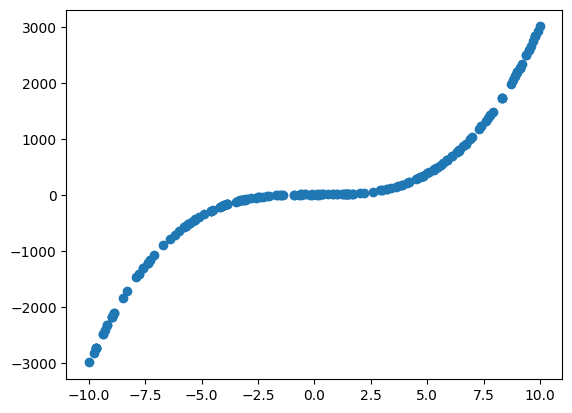

torch.Size([200, 1])
<class 'torch.Tensor'>
torch.Size([200, 1])
<class 'torch.Tensor'>
Epoch [100/1000], Loss: 1490919.0000, Train Loss: 7454.5950, Val Loss: 7454.5950
Epoch [200/1000], Loss: 1352469.0000, Train Loss: 6762.3450, Val Loss: 6762.3450
Epoch [300/1000], Loss: 1149600.6250, Train Loss: 5748.0031, Val Loss: 5748.0031
Epoch [400/1000], Loss: 921550.2500, Train Loss: 4607.7513, Val Loss: 4607.7513
Epoch [500/1000], Loss: 703976.8750, Train Loss: 3519.8844, Val Loss: 3519.8844
Epoch [600/1000], Loss: 514850.0000, Train Loss: 2574.2500, Val Loss: 2574.2500
Epoch [700/1000], Loss: 363114.0938, Train Loss: 1815.5705, Val Loss: 1815.5705
Epoch [800/1000], Loss: 247358.4062, Train Loss: 1236.7920, Val Loss: 1236.7920
Epoch [900/1000], Loss: 162660.8750, Train Loss: 813.3044, Val Loss: 813.3044
Epoch [1000/1000], Loss: 103746.1172, Train Loss: 518.7306, Val Loss: 518.7306
Epoch [1100/1000], Loss: 65212.2500, Train Loss: 326.0612, Val Loss: 326.0612
Epoch [1200/1000], Loss: 41338.859

In [ ]:
# implementing 'early stopping'

import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


sampling_size = 200
x_linr = np.array([random.randint(-100, 100)/10 for _ in range(sampling_size)], dtype=np.float32)
y_linr = np.array([3*x_linr[i]**3 + 7.21 + random.randint(-100, 100)/50  for i in range(sampling_size)])

#x_trn = torch.rand(100, 1) * 10  # Features
#y_trn = 3 * X + 7 + torch.randn(100, 1) * 2  # Labels with noise

import matplotlib.pyplot as plt
plt.scatter(x_linr, y_linr)
plt.show()


x_trn = torch.tensor(x_linr).reshape([x_linr.size, 1])
y_trn = torch.tensor(y_linr).reshape([y_linr.size, 1])

print(x_trn.size())
print(type(x_trn))
print(y_trn.size())
print(type(y_trn))


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 15)
        self.fc2 = nn.Linear(15, 20)
        self.fc3 = nn.Linear(20, 15)
        self.fc4 = nn.Linear(15, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        #x = torch.relu(self.fc1(x))
        #x = torch.sigmoid(self.fc2(x))
        #x = torch.relu(self.fc3(x))
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x


class EarlyStopping:
    def __init__(self, patience=5, delta=0, verbose=False):
        self.patience = patience
        self.delta = delta
        self.verbose = verbose
        self.best_loss = None
        self.no_improvement_count = 0
        self.stop_training = False

    def check_early_stop(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.no_improvement_count = 0
        else:
            self.no_improvement_count += 1
            if self.no_improvement_count >= self.patience:
                self.stop_training = True
                if self.verbose:
                    print("Stopping early as no improvement has been observed.")

# Instantiate early stopping
early_stopping = EarlyStopping(patience=19, delta=0.001)

'''
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(x_trn.shape[1], 10)  # Input layer
        self.relu = nn.ReLU()                          # Activation function
        self.fc2 = nn.Linear(10, 1) # Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
'''

# Instantiate the Model, Define Loss Function and Optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

###
#train_losses, val_losses = [], []

for epoch in range(10000):
    ###
    train_loss = 0.0
    val_loss = 0.0

    model.train()

    # Forward pass
    outputs = model(x_trn)
    loss = criterion(outputs, y_trn)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ###
    train_loss += loss.item()
    train_loss /= len(x_trn)
    #train_losses.append(train_loss / len(x_trn))

    val_loss += loss.item()
    val_loss /= len(y_trn)
    #val_losses.append(val_loss)

    #print(early_stopping.best_loss)
    check_early_stopping = early_stopping.check_early_stop(val_loss)
    if early_stopping.stop_training:
      print(f"Stopping training at epoch {epoch+1}")
      break


    accuracy = (outputs.round() == y_trn.round()).float().mean()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/1000], Loss: {loss.item():.4f}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
        #, Accuracy: {accuracy.item():.4f}')


model.eval()
with torch.no_grad():
    #test_data = torch.tensor([[10.0], [21.0], [13.0], [25.0]])
    #test_data = x_trn
    predictions = model(torch.tensor([[1.0], [5.21], [3.6], [-2.5]]))
    #accuracy = (predictions.round() == torch.tensor(y_linr_trans).round()).float().mean()
    print()
    print(f'Predictions:\n{predictions}')
    #, Accuracy: {accuracy.item():.4f}')

    x_test = [[1.0], [5.21], [3.6], [-2.5]]
    y_test = [3*x_test[i][0]**3+7.21 for i in range(len(x_test))]
    print(y_test)

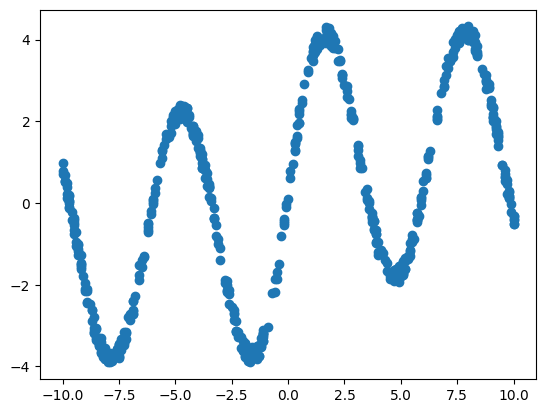

torch.Size([600, 1])
<class 'torch.Tensor'>
torch.Size([600, 1])
<class 'torch.Tensor'>
Epoch [100/5000], Loss: 4.6490
Epoch [200/5000], Loss: 4.5387
Epoch [300/5000], Loss: 4.4325
Epoch [400/5000], Loss: 4.3410
Epoch [500/5000], Loss: 4.2402
Epoch [600/5000], Loss: 4.0545
Epoch [700/5000], Loss: 3.5278
Epoch [800/5000], Loss: 2.6570
Epoch [900/5000], Loss: 2.3273
Epoch [1000/5000], Loss: 2.0917
Epoch [1100/5000], Loss: 1.8853
Epoch [1200/5000], Loss: 1.8066
Epoch [1300/5000], Loss: 1.6556
Epoch [1400/5000], Loss: 1.5234
Epoch [1500/5000], Loss: 1.5008
Epoch [1600/5000], Loss: 1.3693
Epoch [1700/5000], Loss: 1.2711
Epoch [1800/5000], Loss: 1.2554
Epoch [1900/5000], Loss: 1.1375
Epoch [2000/5000], Loss: 1.1431
Epoch [2100/5000], Loss: 1.0204
Epoch [2200/5000], Loss: 2.1849
Epoch [2300/5000], Loss: 0.9530
Epoch [2400/5000], Loss: 0.9069
Epoch [2500/5000], Loss: 0.9909
Epoch [2600/5000], Loss: 0.8335
Epoch [2700/5000], Loss: 0.8700
Epoch [2800/5000], Loss: 0.8841
Epoch [2900/5000], Loss: 

In [ ]:
import random, math
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

sampling_size = 600
x_linr = np.array([random.randint(-100, 100)/10 for _ in range(sampling_size)], dtype=np.float32)
y_linr = np.array([3*math.sin(x_linr[i])+math.tanh(x_linr[i]) + 0.21 + random.randint(-100, 100)/500  for i in range(sampling_size)], dtype=np.float32)

#x_trn = torch.rand(100, 1) * 10  # Features
#y_trn = 3 * X + 7 + torch.randn(100, 1) * 2  # Labels with noise

import matplotlib.pyplot as plt
plt.scatter(x_linr, y_linr)
plt.show()


x_trn = torch.tensor(x_linr).reshape([x_linr.size, 1])
y_trn = torch.tensor(y_linr).reshape([y_linr.size, 1])

print(x_trn.size())
print(type(x_trn))
print(y_trn.size())
print(type(y_trn))


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 15)
        self.fc2 = nn.Linear(15, 20)
        self.fc3 = nn.Linear(20, 15)
        self.fc4 = nn.Linear(15, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        #x = torch.relu(self.fc1(x))
        #x = torch.sigmoid(self.fc2(x))
        #x = torch.relu(self.fc3(x))
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.tanh(self.fc3(x))
        x = self.fc4(x)
        return x
'''

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(x_trn.shape[1], 10)  # Input layer
        self.relu = nn.ReLU()                          # Activation function
        self.fc2 = nn.Linear(10, 1) # Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
'''

# Instantiate the Model, Define Loss Function and Optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9)

for epoch in range(5000):
    model.train()

    # Forward pass
    outputs = model(x_trn)
    loss = criterion(outputs, y_trn)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = (outputs.round() == y_trn.round()).float().mean()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/5000], Loss: {loss.item():.4f}')
        #, Accuracy: {accuracy.item():.4f}')


model.eval()
with torch.no_grad():
    #test_data = torch.tensor([[10.0], [21.0], [13.0], [25.0]])
    #test_data = x_trn
    predictions = model(torch.tensor([[1.0], [5.21], [3.6], [-2.5]]))
    #accuracy = (predictions.round() == torch.tensor(y_linr_trans).round()).float().mean()
    print()
    print(f'Predictions:\n{predictions}')
    #, Accuracy: {accuracy.item():.4f}')

    x_test = [[1.0], [5.21], [3.6], [-2.5]]
    y_test = [3*math.sin(x_test[i][0])+math.tanh(x_test[i][0])+0.21 for i in range(len(x_test))]
    print(y_test)


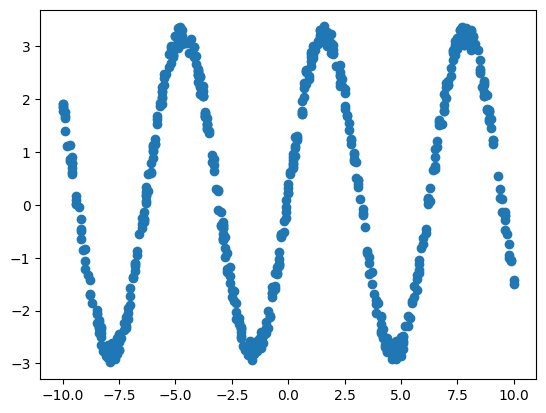

torch.Size([600, 1])
<class 'torch.Tensor'>
torch.Size([600, 1])
<class 'torch.Tensor'>
Epoch [100/3000], Loss: 2.8763
Epoch [200/3000], Loss: 1.4258
Epoch [300/3000], Loss: 1.1195
Epoch [400/3000], Loss: 1.0870
Epoch [500/3000], Loss: 1.0064
Epoch [600/3000], Loss: 1.1066
Epoch [700/3000], Loss: 0.9616
Epoch [800/3000], Loss: 0.9284
Epoch [900/3000], Loss: 0.9044
Epoch [1000/3000], Loss: 0.8848
Epoch [1100/3000], Loss: 0.8781
Epoch [1200/3000], Loss: 0.8577
Epoch [1300/3000], Loss: 0.8414
Epoch [1400/3000], Loss: 0.7683
Epoch [1500/3000], Loss: 1.1376
Epoch [1600/3000], Loss: 0.7872
Epoch [1700/3000], Loss: 0.5626
Epoch [1800/3000], Loss: 0.5992
Epoch [1900/3000], Loss: 0.4495
Epoch [2000/3000], Loss: 0.4635
Epoch [2100/3000], Loss: 0.3593
Epoch [2200/3000], Loss: 0.4075
Epoch [2300/3000], Loss: 0.3065
Epoch [2400/3000], Loss: 0.2505
Epoch [2500/3000], Loss: 0.2639
Epoch [2600/3000], Loss: 0.2674
Epoch [2700/3000], Loss: 0.5091
Epoch [2800/3000], Loss: 0.0684
Epoch [2900/3000], Loss: 

In [ ]:
import random, math
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

sampling_size = 600
x_linr = np.array([random.randint(-100, 100)/10 for _ in range(sampling_size)], dtype=np.float32)
y_linr = np.array([3*math.sin(x_linr[i]) + 0.21 + random.randint(-100, 100)/500  for i in range(sampling_size)], dtype=np.float32)

#x_trn = torch.rand(100, 1) * 10  # Features
#y_trn = 3 * X + 7 + torch.randn(100, 1) * 2  # Labels with noise

import matplotlib.pyplot as plt
plt.scatter(x_linr, y_linr)
plt.show()


x_trn = torch.tensor(x_linr).reshape([x_linr.size, 1])
y_trn = torch.tensor(y_linr).reshape([y_linr.size, 1])

print(x_trn.size())
print(type(x_trn))
print(y_trn.size())
print(type(y_trn))


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 15)
        self.fc2 = nn.Linear(15, 20)
        self.fc3 = nn.Linear(20, 15)
        self.fc4 = nn.Linear(15, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        #x = torch.relu(self.fc1(x))
        #x = torch.sigmoid(self.fc2(x))
        #x = torch.relu(self.fc3(x))
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.tanh(self.fc3(x))
        x = self.fc4(x)
        return x
'''

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(x_trn.shape[1], 10)  # Input layer
        self.relu = nn.ReLU()                          # Activation function
        self.fc2 = nn.Linear(10, 1) # Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
'''

# Instantiate the Model, Define Loss Function and Optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)

for epoch in range(5000):
    model.train()

    # Forward pass
    outputs = model(x_trn)
    loss = criterion(outputs, y_trn)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = (outputs.round() == y_trn.round()).float().mean()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/3000], Loss: {loss.item():.4f}')
        #, Accuracy: {accuracy.item():.4f}')


model.eval()
with torch.no_grad():
    #test_data = torch.tensor([[10.0], [21.0], [13.0], [25.0]])
    #test_data = x_trn
    predictions = model(torch.tensor([[1.0], [5.21], [3.6], [-2.5]]))
    #accuracy = (predictions.round() == torch.tensor(y_linr_trans).round()).float().mean()
    print()
    print(f'Predictions:\n{predictions}')
    #, Accuracy: {accuracy.item():.4f}')

    x_test = [[1.0], [5.21], [3.6], [-2.5]]
    y_test = [3*math.sin(x_test[i][0])+0.21 for i in range(len(x_test))]
    print(y_test)


In [ ]:
# exporting model
torch.save(model, 'model.pth')

In [ ]:
# importing model and making summary
model_imp = torch.load('/content/model.pth', weights_only=False)
model_imp.eval()  # Set to evaluation mode if needed

SimpleNN(
  (fc1): Linear(in_features=1, out_features=15, bias=True)
  (fc2): Linear(in_features=15, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=15, bias=True)
  (fc4): Linear(in_features=15, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (relu): ReLU()
  (tanh): Tanh()
)

In [ ]:
# using imported model
predictions_imp = model_imp(torch.tensor([[1.0], [5.21], [3.6], [-2.5]]))
#accuracy = (predictions.round() == torch.tensor(y_linr_trans).round()).float().mean()
print()
print(f'Predictions:\n{predictions_imp}')


Predictions:
tensor([[ 2.7962],
        [-2.3263],
        [-1.0603],
        [-1.5558]], grad_fn=<AddmmBackward0>)


In [ ]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor

    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.x)

x = torch.arange(10)
y = torch.arange(10) + 1

my_dataset = MyDataset(x, y)
loader = DataLoader(my_dataset, batch_size=4, shuffle=True, num_workers=0)

for x, y in loader:
    print("x:", x, "y:", y)

x: tensor([1, 9, 4, 2]) y: tensor([ 2, 10,  5,  3])
x: tensor([5, 3, 6, 8]) y: tensor([6, 4, 7, 9])
x: tensor([7, 0]) y: tensor([8, 1])


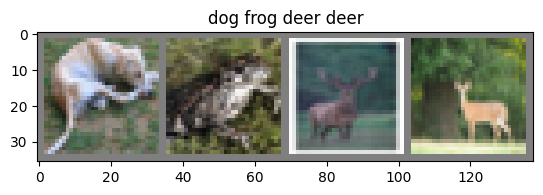

In [ ]:
import torchvision
import matplotlib.pyplot as plt

trainloader_display = torch.utils.data.DataLoader(trainset,
                                          batch_size=4,
                                          shuffle=True)
images, labels = next(iter(trainloader_display))
plt.imshow(torchvision.utils.make_grid(images).permute(1, 2, 0) / 2 + 0.5);
plt.title(' '.join(trainset.classes[label] for label in labels)); plt.show()

100%|██████████| 9.91M/9.91M [00:00<00:00, 34.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.09MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 8.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.06MB/s]


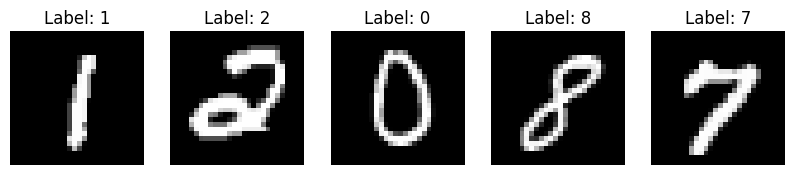

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define transformations
transform = transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.1307,), (0.3081,)) # Normalize with mean and std
])

# Load datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Visualize some images
data_iter = iter(train_loader)
images, labels = next(data_iter)

fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
  axes[i].imshow(images[i].squeeze(), cmap='gray')
  axes[i].set_title(f"Label: {labels[i]}")
  axes[i].axis('off')
plt.show()

In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define a simple neural network
class SimpleNN(nn.Module):
  def __init__(self):
    super(SimpleNN, self).__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(28*28, 128)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    x = self.flatten(x)
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    return self.fc3(x)

# Initialize model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(10): # Train for 5 epochs
  for images, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

print("Training complete!")

Training complete!


In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define a simple neural network
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(10): # Train for 5 epochs
  for images, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    print(loss.item())

print("Training complete!")

Streaming output truncated to the last 5000 lines.
0.1493992954492569
0.025780722498893738
0.12013646215200424
0.04266347736120224
0.009425479918718338
0.18154990673065186
0.0280672125518322
0.049073196947574615
0.06041495129466057
0.02710944041609764
0.04004343971610069
0.011393818072974682
0.02376554347574711
0.10790695995092392
0.023973310366272926
0.02775769867002964
0.019577670842409134
0.06159922853112221
0.08331281691789627
0.07110589742660522
0.016919849440455437
0.12964436411857605
0.10004760324954987
0.14742951095104218
0.03997839614748955
0.04154539853334427
0.04202151298522949
0.07207391411066055
0.023550119251012802
0.04813360422849655
0.12063401937484741
0.030976219102740288
0.03929773345589638
0.08990969508886337
0.03051747754216194
0.028681108728051186
0.06758314371109009
0.1147046908736229
0.05202542617917061
0.16623765230178833
0.13693034648895264
0.06347136199474335
0.021050849929451942
0.07703649252653122
0.03200729936361313
0.025581855326890945
0.016957109794020653

In [ ]:
# Create a CART classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training set
clf.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

# Predict the fruit type for a new instance
new_instance =  X_test.iloc[0:1]
predicted_punctuality_type = clf.predict(new_instance)
print(f"Predicted Punctuality of Delivery': {'On-Time' if predicted_punctuality_type == 1 else 'Delay'}")

Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.06      0.08        31
           1       0.84      0.89      0.86       169

    accuracy                           0.76       200
   macro avg       0.47      0.48      0.47       200
weighted avg       0.72      0.76      0.74       200

Predicted Punctuality of Delivery': On-Time
